In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
import seaborn as sns
# importing ploting libraries
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
chinese_df = pd.read_csv("fall_detection.csv")

In [4]:
chinese_df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,3,4722.92,4019.64,-1600.00,13,79,317,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4059.12,2191.03,-1146.08,20,54,165,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4773.56,2787.99,-1263.38,46,67,224,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8271.27,9545.98,-2848.93,26,138,554,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7102.16,14148.80,-2381.15,85,120,809,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
chinese_df = chinese_df.drop(['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10' ,'Unnamed: 11' ,'Unnamed: 12'], axis = 1)

In [6]:
chinese_df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [6]:
chinese_df.tail()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
16377,4,9280.68,11417.00,-3021.64,36,156,654
16378,3,8479.69,9455.54,-2932.85,17,138,554
16379,2,8872.53,27449.90,-2870.00,33,156,1364
16380,4,7738.99,26466.40,-2920.24,97,156,1521
16381,3,9368.34,39149.10,-2970.00,21,196,1885


### 1) Perform variable exploration esp. with respect to the activity values – are there any outliers? How will you deal with these? – 15 marks

In [7]:
chinese_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTIVITY,16382.0,2.361494,1.739195,0.000000e+00,0.000,3.000,4.00,5.0
TIME,16382.0,10936.842478,5261.463601,1.954230e+03,7263.685,9769.355,13481.65,50895.5
SL,16382.0,75271.979925,127502.241688,4.222420e+01,9941.170,31189.200,80761.45,2426140.0
EEG,16382.0,-5621.125313,108220.924420,-1.262600e+07,-5630.000,-3361.275,-2150.00,1410000.0
BP,16382.0,58.251068,48.292926,0.000000e+00,25.000,44.000,78.00,533.0
HR,16382.0,211.536992,129.949521,3.300000e+01,119.000,180.000,271.00,986.0
CIRCLUATION,16382.0,2894.341472,3825.927830,5.000000e+00,587.000,1581.000,3539.00,52210.0


NOTE: 
   * Huge Amount of Standard Deviation in EEG monitoring rate and Sugar Level which is to be expected relating to the patients.
   * Data will be biased towards Time,EEG monitoring rate and Sugar Level as having large scale values.

In [8]:
chinese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [9]:
chinese_df.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [10]:
chinese_df.isna().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

No Null/NA Values

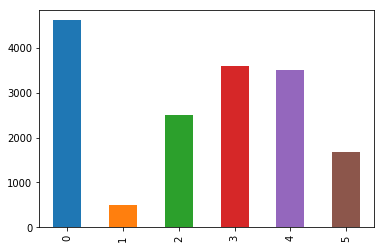

In [11]:
chinese_df.ACTIVITY.value_counts().sort_index().plot.bar()

0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


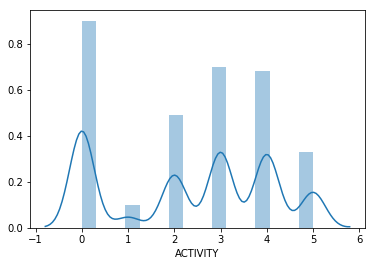

In [12]:
sns.distplot(chinese_df['ACTIVITY'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


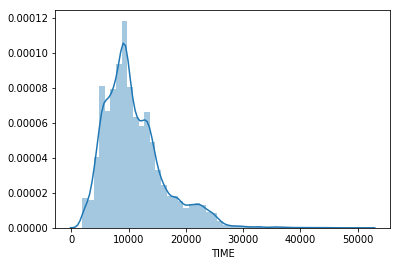

In [13]:
sns.distplot(chinese_df['TIME'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


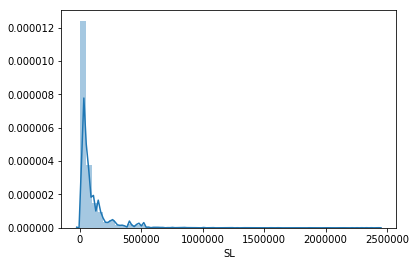

In [14]:
sns.distplot(chinese_df['SL'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


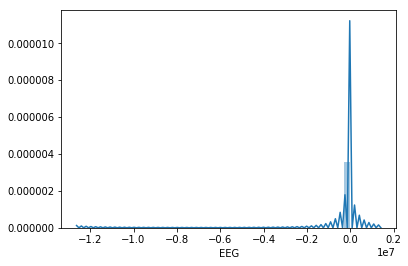

In [15]:
sns.distplot(chinese_df['EEG'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


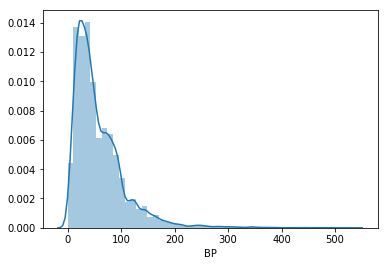

In [16]:
sns.distplot(chinese_df['BP'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


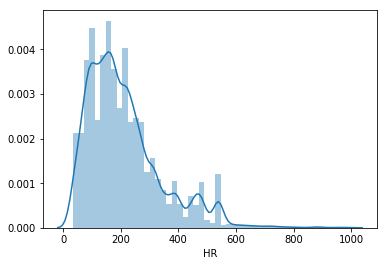

In [17]:
sns.distplot(chinese_df['HR'], kde=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


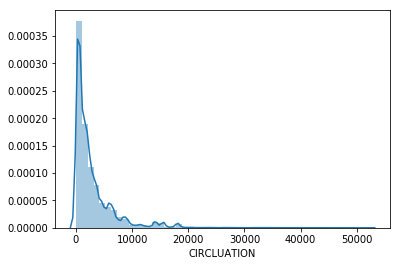

In [18]:
sns.distplot(chinese_df['CIRCLUATION'], kde=True)

Note:
* From Above Distribution, we can determine that data is not properly normal
* SO we'll scale the data using Zscore in further instance

In [19]:
chinese_df.columns

Index(['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

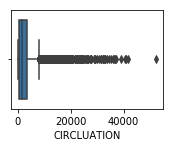

In [20]:
plt.subplot(2,2,1)
sns.boxplot(chinese_df['CIRCLUATION'])

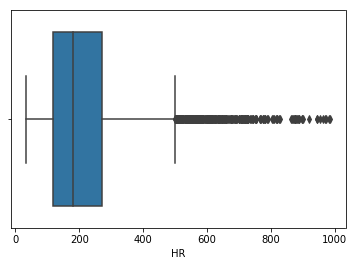

In [21]:
sns.boxplot(chinese_df['HR'])

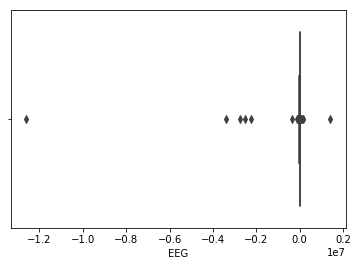

In [22]:
sns.boxplot(chinese_df['EEG'])

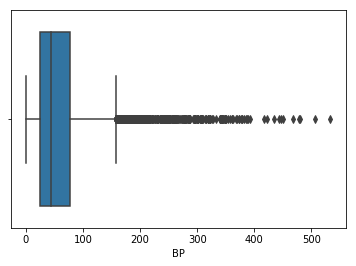

In [23]:
sns.boxplot(chinese_df['BP'])

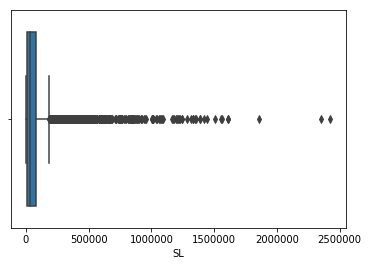

In [24]:
sns.boxplot(chinese_df['SL'])

Outliers are majorly present in all the columns, we will deal with by using:
* Using Manhatten Distance instead of other distances
* Replacing the outliers with values of upper whisker of the boxplot which is not recommended due to lack of domain knowledge.
* Getting data after using PCA.

## 2) Which of the variables explain the activity best? Are there more than a few variables that will correlate to the activity in a combination? How can we best explain this – 15 marks

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


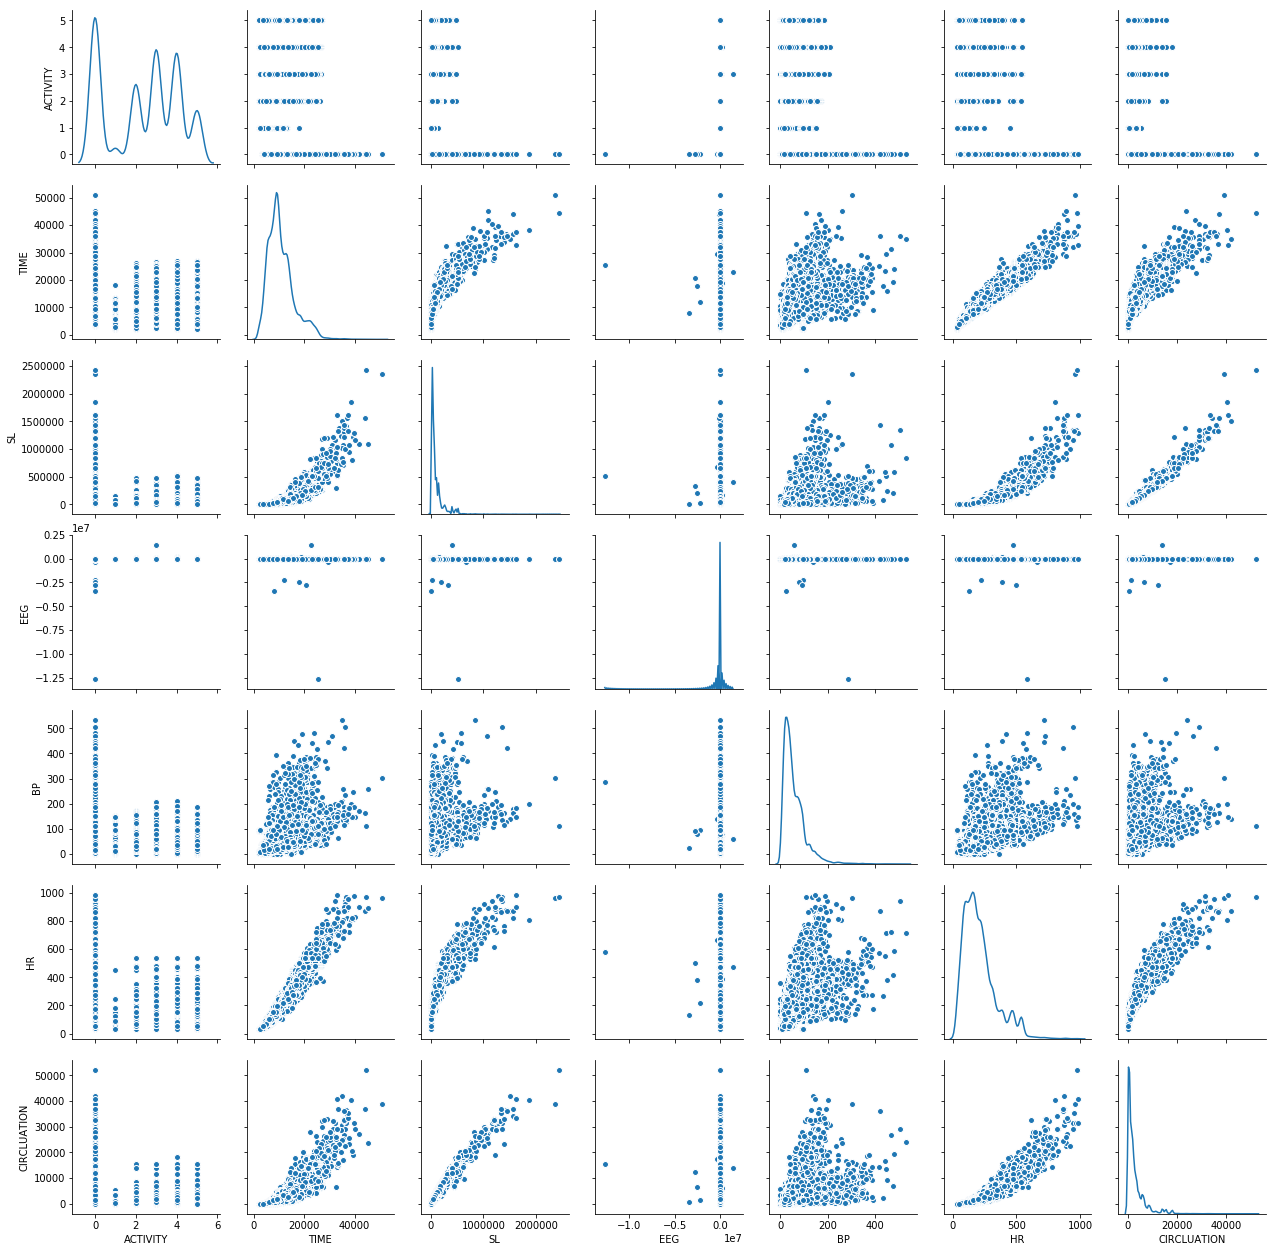

In [25]:
import seaborn as sns
sns.pairplot(chinese_df,diag_kind='kde')

In [26]:
chinese_df.corr()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
ACTIVITY,1.000000,-0.110405,-0.146789,0.027084,-0.116499,-0.144609,-0.134331
TIME,-0.110405,1.000000,0.843200,-0.048278,0.442334,0.973901,0.876956
SL,-0.146789,0.843200,1.000000,-0.050946,0.401064,0.859408,0.978060
EEG,0.027084,-0.048278,-0.050946,1.000000,-0.049892,-0.050316,-0.050408
BP,-0.116499,0.442334,0.401064,-0.049892,1.000000,0.469164,0.419356
HR,-0.144609,0.973901,0.859408,-0.050316,0.469164,1.000000,0.904160
CIRCLUATION,-0.134331,0.876956,0.978060,-0.050408,0.419356,0.904160,1.000000


In [12]:
def correlation_heat_map(dff):
    corrs = dff.corr()

    # Set the figure size
    fig, ax = plt.subplots(figsize=(20,18))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

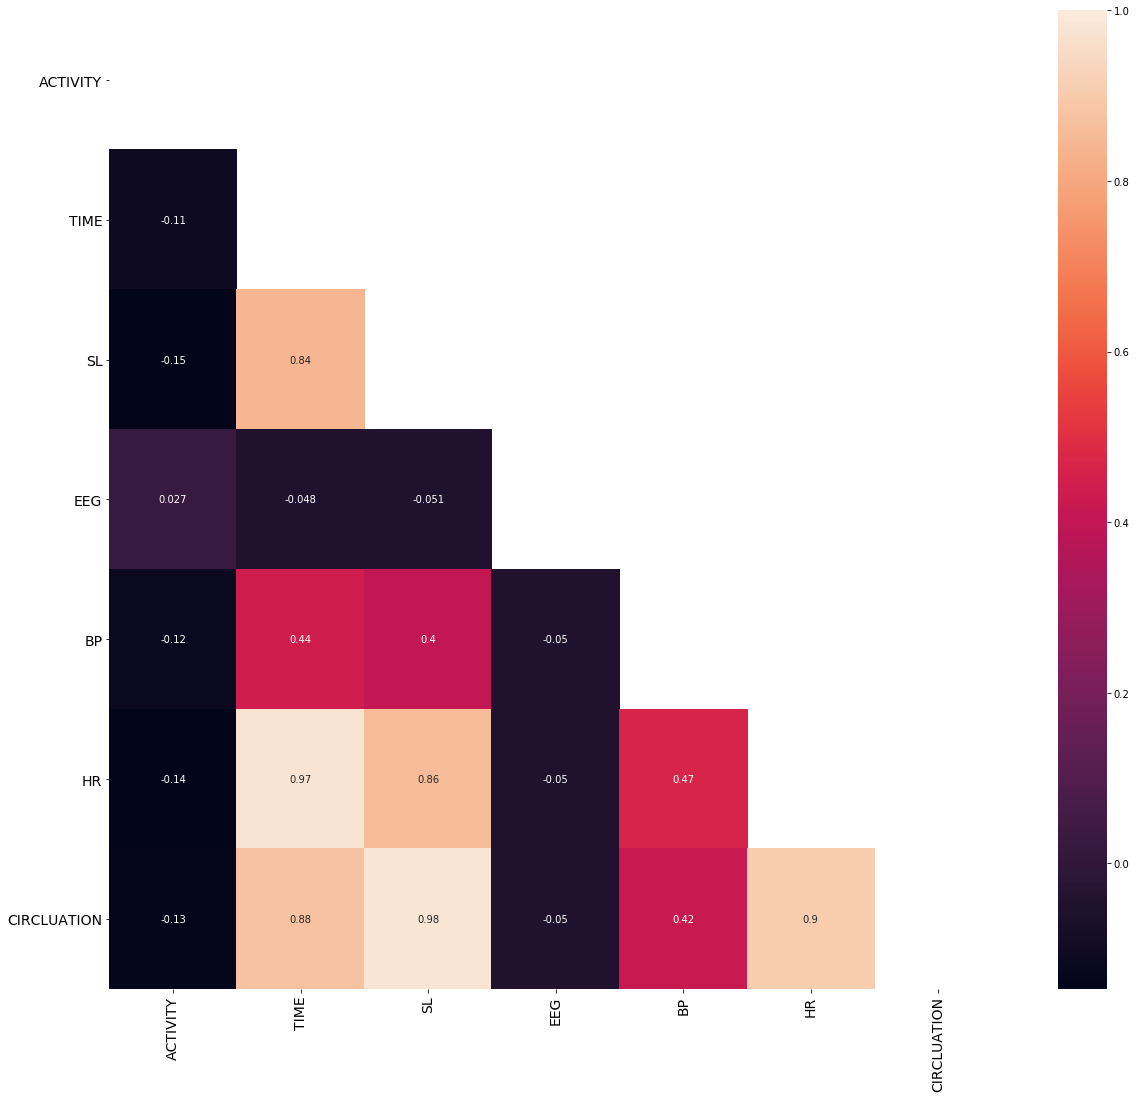

In [13]:
correlation_heat_map(chinese_df)

Conclusion(Pairplot):
   * Heart beat rate 'HR' and Blood Circulation 'CICLUATION' is highly Correlated with Time
   * Heart beat rate 'HR' and Blood Circulation 'CICLUATION' is also highly Correlated with Sugar Level 'SL'
   * Heart beat rate 'HR' is also highly Correlated with Blood Circulation'CICLUATION'
   * Sugar Level 'SL' is also highly Correlated with Time.

#### SO, actively speaking, there isn't a single variable which have relation with Activity variable.

Conclusion:
* Variables that should determine the clusters are Bp and HR due its variable of data points.
* Following data points will show the distinctlness w.r.t to Blood Pressure and Heart Beat Rate.


## 3) Between Heartrate and BP which gives the best cluster for activities? Explain your answer – 20 marks

##### Normalization/Regularization by appying Zscore

In [7]:
data_scaled = chinese_df.apply(zscore)

In [8]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTIVITY,16382.0,3.195195e-16,1.000031,-1.357850,-1.357850,0.367138,0.942135,1.517131
TIME,16382.0,-4.551799e-16,1.000031,-1.707298,-0.698146,-0.221901,0.483684,7.594822
SL,16382.0,-9.531978e-18,1.000031,-0.590045,-0.512405,-0.345752,0.043055,18.438419
EEG,16382.0,-1.903515e-18,1.000031,-116.620368,-0.000082,0.020882,0.032075,13.081244
BP,16382.0,-1.297813e-16,1.000031,-1.206240,-0.688550,-0.295105,0.408953,9.830910
HR,16382.0,1.526667e-16,1.000031,-1.373937,-0.712121,-0.242694,0.457599,5.959904
CIRCLUATION,16382.0,6.621895e-17,1.000031,-0.755223,-0.603099,-0.343284,0.168502,12.890249


In [29]:
model = KMeans(n_clusters = 6)

In [30]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,114674.000000
1,2,71936.467615
2,3,60597.031948
3,4,47008.006638
4,5,38404.617244
5,6,34011.180164
6,7,29688.824717
7,8,26279.304340
8,9,23599.121785
9,10,21389.745873


The total sum of squared distances of every data point from respective centroid is also called inertia.
Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

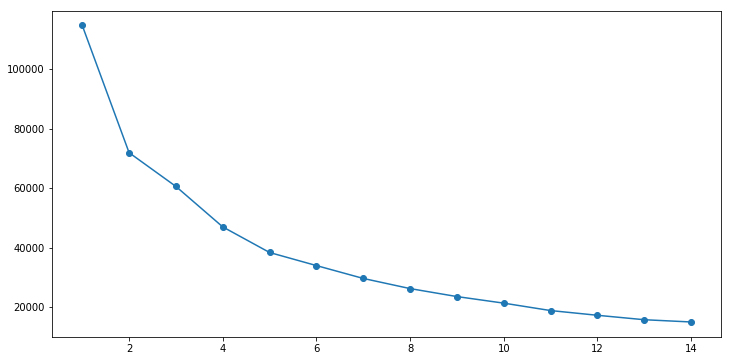

In [31]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Here we'll take k = 3 first

# K-Means Clustering Method

In [42]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [43]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_scaled) )
centroid_df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,-0.394658,1.706869,1.642752,-0.051642,1.072305,1.776522,1.736884
1,0.078609,-0.339750,-0.327046,0.018809,-0.213660,-0.353614,-0.345759
2,-1.357850,2.739142,3.431448,-116.620368,4.716133,2.835518,3.254384


If we consider the clusters on the basis of BP:
    * Cluster 1 gives the minimum (negative value)
    * Cluster 2 gives the max values (positive value)
    * Cluster 0 gives the values distinctly between the Cluster 1 and Cluster 2

Here if we take k = 6

In [45]:
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [46]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_scaled) )
centroid_df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,-0.492551,1.271196,0.815688,-0.034907,1.143040,1.352269,0.956246
1,0.753377,0.114735,-0.153588,0.017392,-0.091146,0.052112,-0.096760
2,-1.357850,2.739142,3.431448,-116.620368,4.716133,2.835518,3.254384
3,-0.310389,2.557806,3.647232,-0.085872,1.081965,2.594641,3.592214
4,-1.337918,-0.271974,-0.312328,-0.002548,-0.310917,-0.254941,-0.326997
5,0.374580,-0.866981,-0.526038,0.035013,-0.388476,-0.859628,-0.627746


Note: Here HR gives most distinct values rather than the BP w.r.t Activity

In [48]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [52]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
chinese_df_labeled = X.join(df_labels)

In [55]:
df_analysis = (chinese_df_labeled.groupby(['labels'] , axis=0)).head(1599)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis.head(10)

,TIME,SL,EEG,BP,HR,CIRCLUATION,labels
0,4722.92,4019.64,-1600.00,13,79,317,5
1,4059.12,2191.03,-1146.08,20,54,165,5
2,4773.56,2787.99,-1263.38,46,67,224,5
3,8271.27,9545.98,-2848.93,26,138,554,5
4,7102.16,14148.80,-2381.15,85,120,809,5
5,7015.24,7336.79,-1699.80,22,95,427,5
6,8620.28,24949.90,-3198.06,35,157,1519,5
7,9238.73,39245.50,-2590.00,15,196,1885,1
8,12276.40,59742.00,-5101.00,56,249,2826,4
9,14165.50,140950.00,-1410.00,82,315,5844,1


# Conclusion: Heart Beat Rate definely gives most distinct cluster.


#### NOTE: Above Model is not appropiate due to the effect of outliers in the data, so we'll use Bottom Up Approach – Agglomerative model Approach instead of K-means using affinity as Manhatten distance

## Bottom Up Approach – Agglomerative model Approach

In [38]:
# Library for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 

In [40]:
# Using Manhatten Distance thus, outliers will not affect the model
model = AgglomerativeClustering(n_clusters=6, affinity="manhattan",  linkage='average')
model3 = AgglomerativeClustering(n_clusters=3, affinity="manhattan",  linkage='average')
model4 = AgglomerativeClustering(n_clusters=4, affinity="manhattan",  linkage='average')
model2 = AgglomerativeClustering(n_clusters=2, affinity="manhattan",  linkage='average')

In [41]:
model.fit(data_scaled)
model3.fit(data_scaled)
model4.fit(data_scaled)
model2.fit(data_scaled)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2,
            pooling_func=<function mean at 0x0000025897EC4C80>)

In [37]:
centroids2 = kmeans.cluster_centers_
centroids2

array([[-4.92550540e-01,  1.27119614e+00,  8.15687829e-01,
        -3.49065782e-02,  1.14304039e+00,  1.35226933e+00,
         9.56246157e-01],
       [ 7.53376733e-01,  1.14734940e-01, -1.53588385e-01,
         1.73922304e-02, -9.11456060e-02,  5.21115568e-02,
        -9.67603298e-02],
       [-1.35785035e+00,  2.73914228e+00,  3.43144848e+00,
        -1.16620368e+02,  4.71613342e+00,  2.83551838e+00,
         3.25438406e+00],
       [-3.10389302e-01,  2.55780560e+00,  3.64723182e+00,
        -8.58719893e-02,  1.08196467e+00,  2.59464059e+00,
         3.59221365e+00],
       [-1.33791763e+00, -2.71973962e-01, -3.12328221e-01,
        -2.54750606e-03, -3.10917415e-01, -2.54941366e-01,
        -3.26996623e-01],
       [ 3.74579882e-01, -8.66980703e-01, -5.26038485e-01,
         3.50128193e-02, -3.88475587e-01, -8.59628097e-01,
        -6.27746203e-01]])

In [38]:
chinese_df['labels'] = model.labels_
type(data_scaled)

pandas.core.frame.DataFrame

In [39]:
chinese_df['labels'].value_counts()

2    16342
1       32
0        4
5        2
4        1
3        1
Name: labels, dtype: int64

In [40]:
chinese_clusters = chinese_df.groupby(['labels'])
df1 = chinese_clusters.get_group(3)
df1.shape

(1, 8)

In [41]:
chinese_groups=chinese_clusters.head(1599)

In [42]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(data_scaled, 'average')#Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(data_scaled))
c

# To run this code my PC and Kernal both died Twice 'xD' i.e. also individually
# and Due to this only, I am unable to see the Value of C for different CLusters.

In [ ]:
# Dendogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=3, leaf_font_size=8. )  #threshold = bisect
plt.tight_layout()

## Principal Component Analysis

In [15]:
chinese_df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [16]:
# Define features
X = chinese_df.drop('ACTIVITY', axis = 1)

# Define categorical outcome 
y = chinese_df['ACTIVITY']

# Standardize feature space to have mean 0 and variance 1 or You can use Z-Score (data.apply(zscore)), (axis = 0) means column
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

X_std.shape

(16382, 6)

In [17]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00006105  0.84325163 -0.04828107  0.4423607   0.97396035  0.8770096 ]
 [ 0.84325163  1.00006105 -0.05094904  0.40108867  0.85946074  0.97811944]
 [-0.04828107 -0.05094904  1.00006105 -0.04989455 -0.05031889 -0.05041143]
 [ 0.4423607   0.40108867 -0.04989455  1.00006105  0.46919266  0.41938194]
 [ 0.97396035  0.85946074 -0.05031889  0.46919266  1.00006105  0.90421557]
 [ 0.8770096   0.97811944 -0.05041143  0.41938194  0.90421557  1.00006105]]


In [18]:
# Step 2: Obtain eigenvectors and eigenvalues / Decomposition Matrix

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix) # linear algo.

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-4.77476418e-01 -2.90285979e-02  1.07314054e-01 -5.56113095e-01
   5.95777242e-01  3.08941756e-01]
 [-4.72747983e-01 -2.92178326e-02  1.87626663e-01  5.70584648e-01
   3.85920792e-01 -5.15703597e-01]
 [ 3.69339657e-02 -9.96121908e-01 -7.97114033e-02  4.69447240e-03
   3.18381388e-04 -9.89823110e-04]
 [-2.79971638e-01  6.63317802e-02 -9.53880713e-01  8.20896812e-02
   2.09074633e-02  1.23176156e-02]
 [-4.84670156e-01 -2.64554471e-02  8.29134369e-02 -4.49877357e-01
  -5.85916567e-01 -4.60252594e-01]
 [-4.83603369e-01 -3.07409799e-02  1.73674893e-01  3.94994930e-01
  -3.90357750e-01  6.53161265e-01]]

Eigenvalues of Cov(X): 
[3.97497548 0.99759    0.75009048 0.23495649 0.02932004 0.01343379]


In [19]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# List Comprehension (Mapping by value/index)
print(eig_pairs)

[(3.974975476420805, array([-0.47747642, -0.47274798,  0.03693397, -0.27997164, -0.48467016,
       -0.48360337])), (0.9975900002388638, array([-0.0290286 , -0.02921783, -0.99612191,  0.06633178, -0.02645545,
       -0.03074098])), (0.7500904791574857, array([ 0.10731405,  0.18762666, -0.0797114 , -0.95388071,  0.08291344,
        0.17367489])), (0.23495648583587272, array([-0.55611309,  0.57058465,  0.00469447,  0.08208968, -0.44987736,
        0.39499493])), (0.029320042934180755, array([ 5.95777242e-01,  3.85920792e-01,  3.18381388e-04,  2.09074633e-02,
       -5.85916567e-01, -3.90357750e-01])), (0.013433793417760269, array([ 0.30894176, -0.5157036 , -0.00098982,  0.01231762, -0.46025259,
        0.65316126]))]


In [20]:
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs

[(0.013433793417760269,
  array([ 0.30894176, -0.5157036 , -0.00098982,  0.01231762, -0.46025259,
          0.65316126])),
 (0.029320042934180755,
  array([ 5.95777242e-01,  3.85920792e-01,  3.18381388e-04,  2.09074633e-02,
         -5.85916567e-01, -3.90357750e-01])),
 (0.23495648583587272,
  array([-0.55611309,  0.57058465,  0.00469447,  0.08208968, -0.44987736,
          0.39499493])),
 (0.7500904791574857,
  array([ 0.10731405,  0.18762666, -0.0797114 , -0.95388071,  0.08291344,
          0.17367489])),
 (0.9975900002388638,
  array([-0.0290286 , -0.02921783, -0.99612191,  0.06633178, -0.02645545,
         -0.03074098])),
 (3.974975476420805,
  array([-0.47747642, -0.47274798,  0.03693397, -0.27997164, -0.48467016,
         -0.48360337]))]

In [21]:
# Doing Reverse
eig_pairs.reverse()
eig_pairs

[(3.974975476420805,
  array([-0.47747642, -0.47274798,  0.03693397, -0.27997164, -0.48467016,
         -0.48360337])),
 (0.9975900002388638,
  array([-0.0290286 , -0.02921783, -0.99612191,  0.06633178, -0.02645545,
         -0.03074098])),
 (0.7500904791574857,
  array([ 0.10731405,  0.18762666, -0.0797114 , -0.95388071,  0.08291344,
          0.17367489])),
 (0.23495648583587272,
  array([-0.55611309,  0.57058465,  0.00469447,  0.08208968, -0.44987736,
          0.39499493])),
 (0.029320042934180755,
  array([ 5.95777242e-01,  3.85920792e-01,  3.18381388e-04,  2.09074633e-02,
         -5.85916567e-01, -3.90357750e-01])),
 (0.013433793417760269,
  array([ 0.30894176, -0.5157036 , -0.00098982,  0.01231762, -0.46025259,
          0.65316126]))]

In [22]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[3.974975476420805, 0.9975900002388638, 0.7500904791574857, 0.23495648583587272, 0.029320042934180755, 0.013433793417760269]


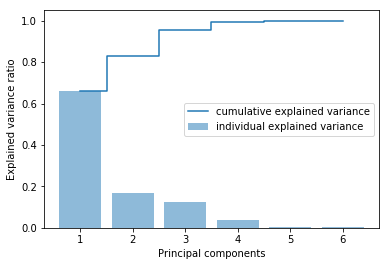

In [23]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)  i.e. Probability Density
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100% . i.e. Cumulative Density


plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance 
# in the data.

AS you can see that, Principal Component 5 and 6 are not contributing at all

In [24]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:4]).transpose() 
# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_data_2D.shape
# np.dot is vector dot product of two vectors.

(16382, 4)

In [25]:
P_reduce

array([[-0.47747642, -0.0290286 ,  0.10731405, -0.55611309],
       [-0.47274798, -0.02921783,  0.18762666,  0.57058465],
       [ 0.03693397, -0.99612191, -0.0797114 ,  0.00469447],
       [-0.27997164,  0.06633178, -0.95388071,  0.08208968],
       [-0.48467016, -0.02645545,  0.08291344, -0.44987736],
       [-0.48360337, -0.03074098,  0.17367489,  0.39499493]])

In [26]:
A =X_std.head(1)
B = P_reduce[0,:]

In [27]:
#Single Data 2D value 
Proj_data_2D[0,:]

array([ 1.91196678e+00, -8.63972459e-04,  4.57697063e-01,  4.53938129e-01])

In [28]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((16382, 6), (6, 4), (16382, 4))

### Now the Above Data is Outlier Free and can be used for Prediction and reducing the clusters will create more predicatable model